In [1]:
! pip3 install wavio
! pip3 install librosa
! pip3 install sounddevice
! pip3 install tensorflow


In [2]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

In [3]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 5

In [190]:
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("audio4.wav",sr,recording)

recording...............


In [191]:
# Look at the discrete number array we got from the audio
x, sr = librosa.load('audio3.wav')
print("recording shape", x.shape)
print("sampling rate", sr)

recording shape (110250,)
sampling rate 22050


Text(117.09722222222221, 0.5, 'Amplitude')

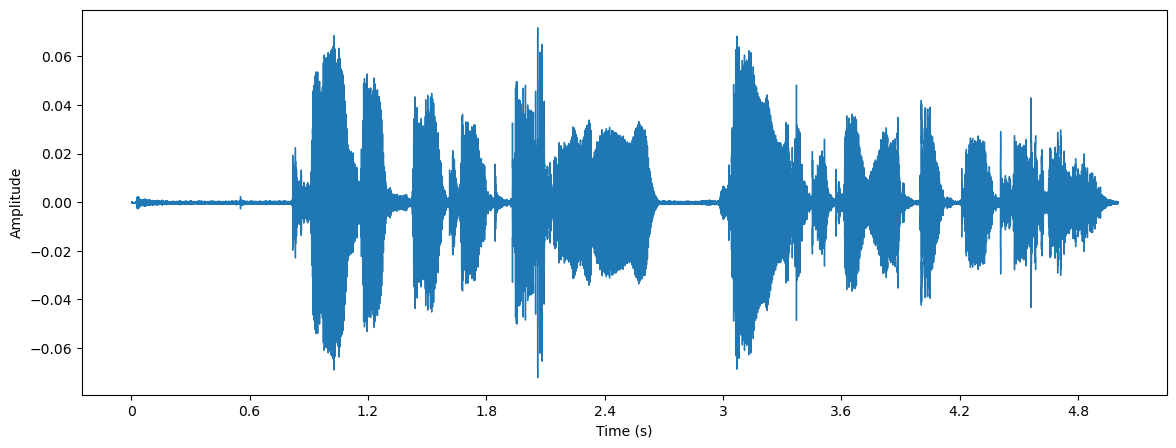

In [192]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

In [193]:
# Play the audio
ipd.Audio(x, rate=sr) # load a NumPy array

In [4]:
#Spectrogram

import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa    
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
import keras
from tensorflow.keras.utils import to_categorical


%matplotlib inline

2024-02-15 21:59:34.735049: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
audio_data = []
labels = []
sampling_rate = []
filenames = []

In [196]:
data, sampling_rate = librosa.load('audio3.wav', sr = 44100)
print(data.shape)
print(sampling_rate)

(220500,)
44100


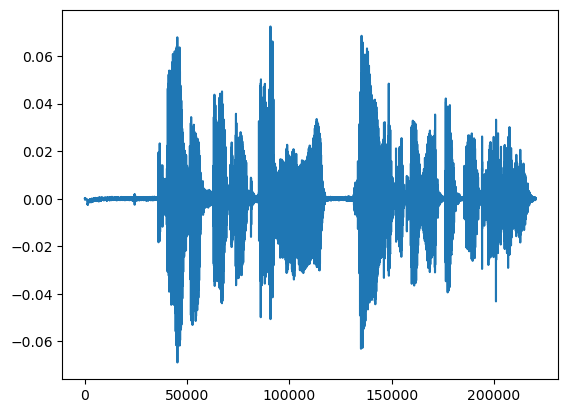

In [197]:
plt.plot(data)
plt.show()

In [198]:
#recording_reshape = recording.flatten()

#freq = librosa.amplitude_to_db(np.abs(librosa.stft(recording_reshape)),ref=np.max)
#print(freq.shape)

freq = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
print(freq.shape)

(1025, 431)


<function matplotlib.pyplot.show(close=None, block=None)>

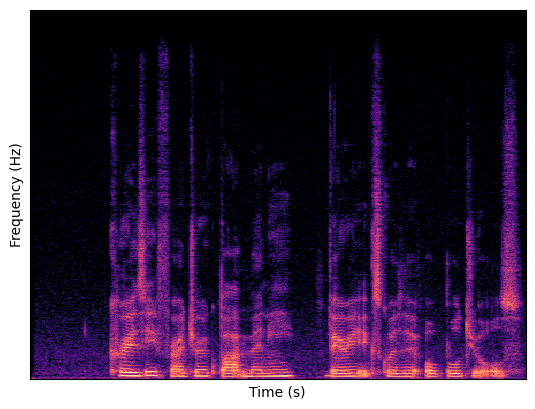

In [207]:
librosa.display.specshow(freq)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")  

In [12]:
#Stereo Speech 

L, sr = librosa.load('audio1.wav', mono=False)
R = np.copy(L);


#output_audio = [L,R];
#output_audio = np.array((L,R))
#output_audio_row = output_audio.T


#write("teamBurdulis-sterosoundfile-delay.wav", sr, output_audio_row)

#delay_samples = 23; #my samples 
#delay_samples = 0; #0ms 
#delay_samples = 44; #1ms
#delay_samples = 441; #10ms 
delay_samples = 4410; #100ms 


R = np.roll(R, delay_samples);
output_audio = [L,R];
output_audio = np.array((L,R))
output_audio_row = output_audio.T
write("teamBurdulis-sterosoundfile-100ms.wav", sr, output_audio_row)


In [18]:
#Attenuation 

L, sr = librosa.load('audio1.wav', mono=False)
R = np.copy(L) * 0.5

delay_samples = 23; #my samples 
#delay_samples = 0; #0ms 


R = np.roll(R, delay_samples);
output_audio = [L,R];
output_audio = np.array((L,R))
output_audio_row = output_audio.T
write("teamBurdulis-sterosoundfile-avghead-6db.wav", sr, output_audio_row)
